In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns

In [5]:
df=pd.read_csv('rfm_data_customer.csv',index_col=0)
df

,revenue,most_recent_visit,number_of_orders,recency_days
customer_id,,,,
22086,777,2006-05-14,9,232
2290,1555,2006-09-08,16,115
26377,336,2006-11-19,5,43
24650,1189,2006-10-29,12,64
12883,1229,2006-12-09,12,23
...,...,...,...,...
3249,998,2006-12-01,10,31
6686,771,2006-06-28,8,187
16418,1016,2006-07-31,9,154


In [7]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.drop('most_recent_visit',axis=1))

In [8]:
clust=[2,3,4,5,6,7,8]
scores=[]

In [9]:
for i in clust:
    km=KMeans(n_clusters=i, random_state=23)
    km.fit(df_scaled)
    scores.append(km.inertia_)

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

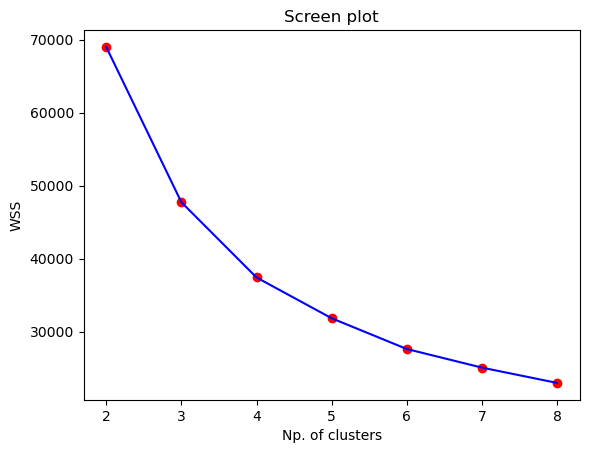

In [10]:
plt.scatter(clust,scores, c='red')
plt.plot(clust,scores, c='blue')
plt.title('Screen plot')
plt.xlabel('Np. of clusters')
plt.ylabel('WSS')
plt.show()

In [20]:
km=KMeans(n_clusters=3, random_state=23)
km.fit(df_scaled)


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=23)

In [21]:
prcomp=PCA()
scores=prcomp.fit_transform(df_scaled)

In [22]:
prcomp.explained_variance_

array([2.0262319 , 0.83256764, 0.14127546])

In [23]:
df_PCs=pd.DataFrame({'PC1':scores[:,0],'PC2':scores[:,1],'cluster':km.labels_})
df_PCs

,PC1,PC2,cluster
0,-0.622635,0.156630,2
1,2.646328,0.520927,1
2,-1.749968,-1.854771,2
3,1.263493,-0.451950,1
4,1.455972,-0.707120,1
...,...,...,...
39994,0.578618,-0.998193,2
39995,-0.715808,-0.240992,2
39996,0.048432,-0.189207,2
39997,-1.123848,-0.339007,2


/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


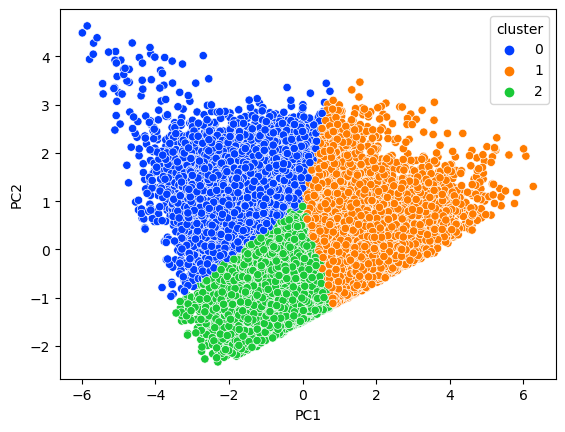

In [24]:
sns.scatterplot(data=df_PCs,x='PC1',y='PC2',hue='cluster',palette='bright')
plt.show()

In [25]:
clust_df=df_PCs.copy()


In [26]:
clust_df['Clusters']=km.labels_
clust_df.sort_values(by='Clusters')

,PC1,PC2,cluster,Clusters
13683,-2.034067,1.675745,0,0
36391,-1.310704,1.156174,0,0
36392,-0.881168,2.419549,0,0
19938,-0.564656,1.383843,0,0
7712,-0.432018,2.374016,0,0
...,...,...,...,...
18080,0.153973,-0.581386,2,2
18079,0.033139,0.786748,2,2
18078,-0.948949,-0.501747,2,2
18074,-0.107650,-0.500224,2,2


In [27]:
clust_df.groupby(by='Clusters').mean()

,PC1,PC2,cluster
Clusters,,,
0,-1.655677,1.257268,0.0
1,1.435257,0.186664,1.0
2,-0.555247,-0.602241,2.0
